## Import pakietów

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(123)

# German credit dataset

In [5]:
# Wczytanie ramki danych oraz objaśnień nazw kolumn
df = pd.read_csv("/home/piotr/Pobrane/german_credit_data_dataset.csv")
col_names = pd.read_csv("/home/piotr/Pobrane/attributes_german_credit_data.csv")

In [6]:
# Ramka danych nie zawiera braków danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_account_status    1000 non-null object
duration                   1000 non-null int64
credit_history             1000 non-null object
purpose                    1000 non-null object
credit_amount              1000 non-null float64
savings                    1000 non-null object
present_employment         1000 non-null object
installment_rate           1000 non-null float64
personal                   1000 non-null object
other_debtors              1000 non-null object
present_residence          1000 non-null float64
property                   1000 non-null object
age                        1000 non-null float64
other_installment_plans    1000 non-null object
housing                    1000 non-null object
existing_credits           1000 non-null float64
job                        1000 non-null object
dependents                 1000 non-null int64
telephone                  

In [37]:
# Opis kolumn z ramki danych
# Ramka zawiera dużo kolumn tekstowych z danymi kategorycznymi
# opisującymi różne cechy kredytobiorców, poza tym dane numeryczne 
col_names

,name,type,description
0,checking_account_status,string,Status of existing checking account (A11: < 0 ...
1,duration,integer,Duration in month
2,credit_history,string,A30: no credits taken/ all credits paid back d...
3,purpose,string,"Purpose of Credit (A40 : car (new), A41 : car ..."
4,credit_amount,float,NaN
5,savings,string,"Savings in accounts/bonds (A61 : < 100 DM, A62..."
6,present_employment,string,"A71 : unemployed, A72 : < 1 year, A73 : 1 <= x..."
7,installment_rate,float,Installment Rate in percentage of disposable i...
8,personal,string,Personal Marital Status and Sex (A91 : male : ...
9,other_debtors,string,"A101 : none, A102 : co-applicant, A103 : guara..."


In [8]:
# Pierwsze podstawowe informacje takie jak średnia długość i kwota
# kredytu, czy średnia liczba kredytów na osobę oraz średni wiek
# kredytobiorcy
df.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


# Rozkłady zmiennych ciągłych

In [30]:
# Funkcja do rysowania histogramu oraz boxplotu
# zmiennych ciągłych
def plot_var(col, variable):
    plot = sns.distplot(col, hist = True, kde = True)
    plot.set_title("Rozkład zmiennej " + variable)
    
    fig, ax = plt.subplots()
    ax.set_title("Zmienna " + variable)
    ax.boxplot(col, vert = False)

## Długość kredytu

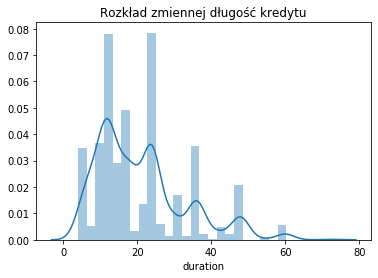

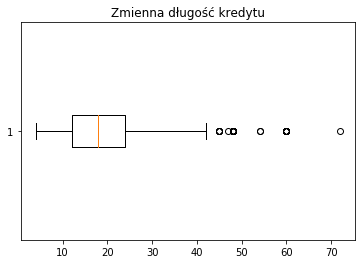

In [31]:
plot_var(df.duration, "długość kredytu")
# Rozkład asymetryczny przesunięty w kierunku długości kredytu
# krótszej niż ok. 20 lat, jednak zauważalna jest popularność 
# kilku konkretnych długości kredytów również w grupie 
# dłuższych niż 20 lat

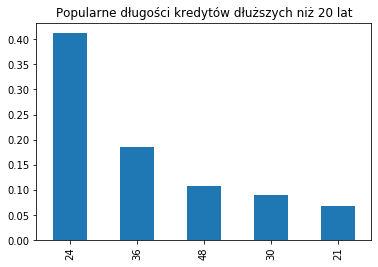

In [33]:
# Popularne długości kredytów dłuższych niż 20 lat
long_duration = df[df.duration>20]
popular_long_durations = long_duration["duration"].value_counts("duration").head(5)
popular_long_durations.plot(kind = 'bar', title = 'Popularne długości kredytów dłuższych niż 20 lat')

## Wartość kredytu

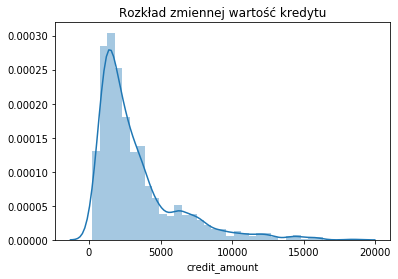

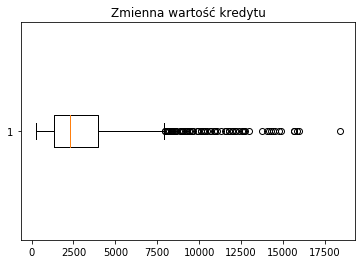

In [34]:
plot_var(df.credit_amount, "wartość kredytu")
# Rozkład asymetryczny, ewidentnie dominują kredyty na
# kwoty do 5000 DM (ok. 11 000 zł)

## Wiek kredytobiorcy

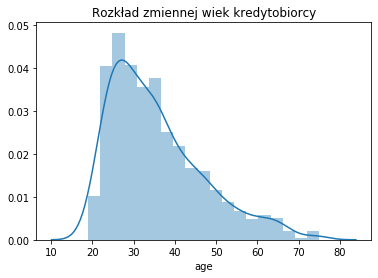

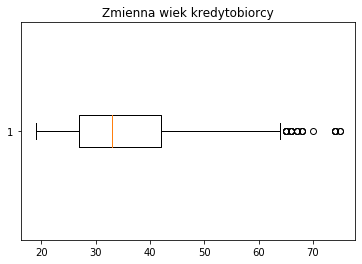

In [35]:
plot_var(df.age, "wiek kredytobiorcy")
# Ponownie rozkład asymetryczn analogiczny do poprzednich,
# liczba kredytobiorców maleje wraz z ich wiekiem

# Zależności między zmiennymi

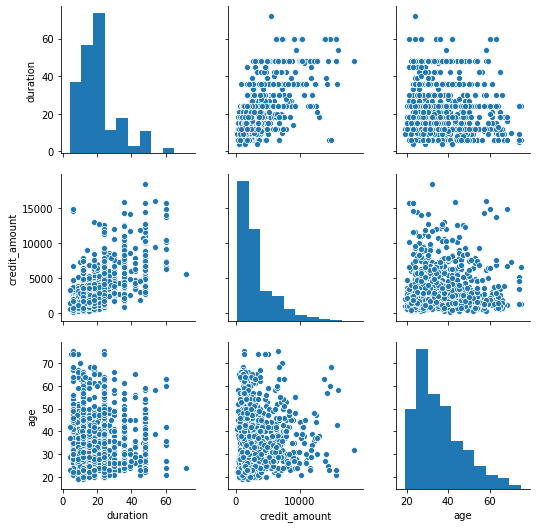

In [44]:
sns.pairplot(df.iloc[:, [1,4,12]])
# Wybrane zmienne:
# - długość kredytu
# - wartość kreytu
# - wiek kredytobiorcy

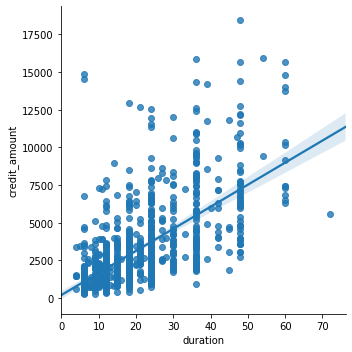

In [52]:
sns.lmplot(y = 'credit_amount', x = 'duration', data = df)

## Korelacje

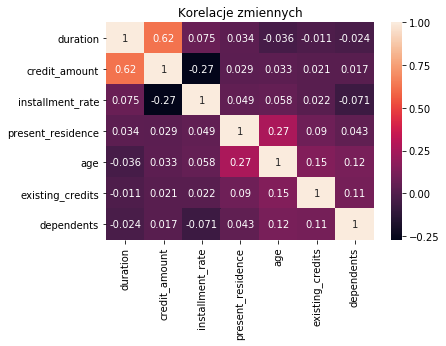

In [50]:
#Zmienna customer_type jest zmienną kategoryczną zapisaną liczbowo
#przez co nie była usuwana automatycznie przez corr()
#dla pozostałych zmiennych możemy wyznaczyć korelację
corr = df.drop("customer_type", axis = 1).corr()

ax=sns.heatmap(corr, xticklabels=corr.columns,
               yticklabels=corr.columns, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacje zmiennych')
plt.show()